In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
x = np.linspace(0,10,30)
y = x**2 + x

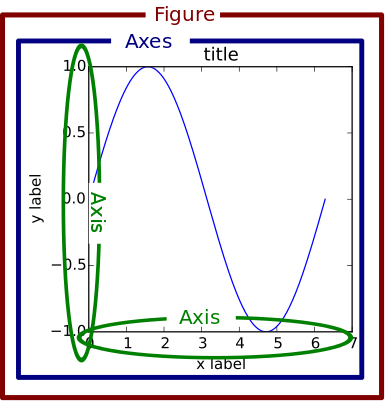

<li><b>Figure Nedir?:</b>Matplotlib'de en üst seviye alan tutucu(container) elemandır.</li>
<li><b>Axes Nedir?:</b>Figure'den sonraki en üst seviye objedir. Figüre nesnesinin içinde bir alt yer tutucudur. Bir figür içinde bir veya daha çok sayıda axes olabilir. Line2D,Tick,Polygon,Text,Polygon gibi objeler axes'lerin içine "plot,text" gibi metotlarla kolayca çizdirebilir.</li>

### 1.Yol : En Kısa Yol(Tek Grafik)
Herhangi bir parçalama ve nesne oluşturma/yakalama yok

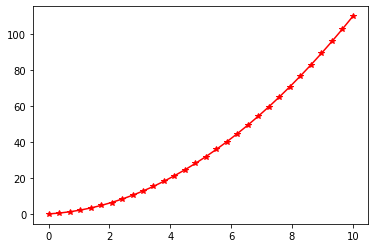

In [18]:
plt.plot(x,y,"r-*") #bu fonksiyon bir Line2D listesi döner
plt.show()

### 2.Yol : Nesne Yakalamadan birden fazla axes çizdirmek(subplot)

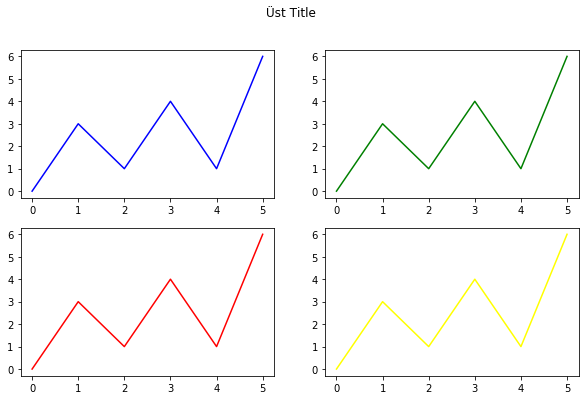

In [78]:
fig = plt.figure(figsize=[10,6])

fig.suptitle("Üst Title")

#Sonraki kısımda bahsedilen aşağıdaki yollar da alternatif olarak kullanılabilir
#plt.subplot2grid()
#plt.subplot(GridSpec)
#plot.subplot(221)
plt.subplot(2,2,1) #satir sayisi, sutün sayısı, çizim yapılacak indis
plt.plot(x,y,"blue")

plt.subplot(2,2,2)
plt.plot(x,y,"green")

plt.subplot(2,2,3)
plt.plot(x,y,"red")

plt.subplot(2,2,4)
plt.plot(x,y,"yellow")

plt.show()

### 3.Yol : Figür oluşturarak bir veya birden fazla grafik çizdirmek(Nesne yakalayarak)

<b>Yol A - figür.add_axes:</b><br/>
Bir figure nesnesinin üzerine <b>bir</b> axes eklemeye yarar. Aldığı ilk parametre bir listedir = [solBaslangicKonumu,altBaslangicKonumu,Genislik,Uzunluk] . Bu değerler 0-1 arasındadır.

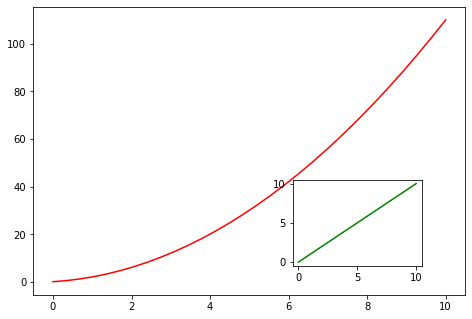

In [89]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(x,y,color="r")

ax2 = fig.add_axes([0.6,0.1,0.3,0.3])
ax2.plot(x,x,color="g")

plt.show()

In [90]:
type(ax1)

matplotlib.axes._axes.Axes

<b>Yol B(Nesne yakalayarak bir veya daha fazla axes çizdirmek): figür.add_subplot:</b><br/>
Bir figure nesnesinin üzerine <b>bir veya daha fazla</b> axes eklemeye yarar. Parametreleri farklı şekillerde ayarlanabilir. Bunlardan 3 tanesini aşağıda açıkladım:

<li><b>add_subplot(nrows, ncols, index):</b> Sırasıyla satır sayısını, sutün sayısını ve indexi ifade eder. Örnek olarak bir figür içine alt alta 3 tane grafik çizdirmek isteyelim:</li> 

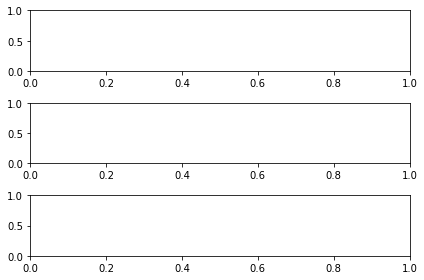

In [55]:
fig = plt.figure()

#3 tane satırımız olmasını istediğimiz için ilk parametremiz 3, sütun sayımız 1
#son parametre ile grafik seçimi yapıyoruz. 1 den başlayıp satır*sütun sayısına kadar gidiyor.
#                     r,c,i
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

fig.tight_layout()

plt.show()

In [60]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

<li><b>add_subplot(tamsayı):</b> Diğer kullanımdan farklı olarak parametreler virgülle ayrılmaz. Yukarıdaki kullanımdaki 3 parametre tek parametre ile belirtilir:</li> 

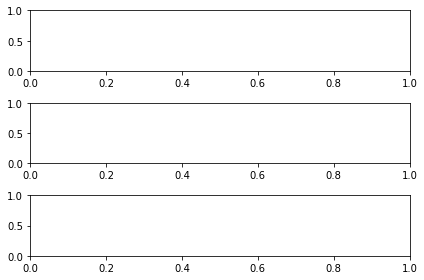

In [61]:
fig = plt.figure()

#3 tane satırımız olmasını istediğimiz için ilk tamsayımız 3, sütun sayımız 1
#son tamsayı ile grafik seçimi yapıyoruz. 1 den başlayıp satır*sütun sayısına kadar gidiyor.
#                     rci
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

fig.tight_layout()

plt.show()

In [62]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

<li><b>add_subplot(GridSpec):</b>Alt grafiğe ayırma işlemi bir yardımcı nesne örneği ile sağlanır:</li> 

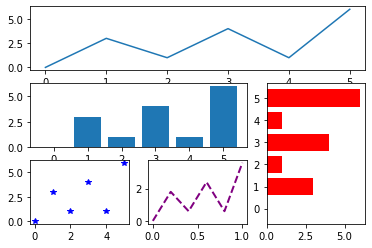

In [65]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3,3) #3 satır 3 sütuna bölünmüş bir alan tanımladık. Bu alanı istediğimiz gibi doldurcaz
ax1 = plt.subplot(gs[0,:]) #ilk satırın tüm sutünlarını(yani satırın tamamını) bu axes ata
ax2 = plt.subplot(gs[1,:2])
ax3 = plt.subplot(gs[1:,2])
ax4 = plt.subplot(gs[2,0])
ax5 = plt.subplot(gs[2,1])
x = np.array([0,1,2,3,4,5])
y = np.array([0,3,1,4,1,6])
ax1.plot(x,y)
ax2.bar(x,y)
ax3.barh(x,y,color="r")
ax4.plot(x,y,"b*")
ax5.plot(x*0.2,y*0.6,color="purple",linewidth=2,linestyle="--")
plt.show()

In [67]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

<b>Yol C - figür.subplot2grid:</b><br/>
figure.add_subplot(GridSpec) yapısının yaptığı işin aynısını yapar.

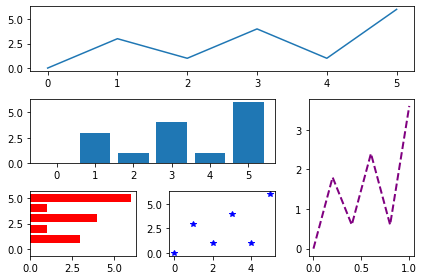

In [71]:
#alternatif yol
fig = plt.figure()

#plt.subplot2grid(shape, loc, rowspan=1, colspan=1)
#shape = parçalamanınŞekli, loc = o anda çizilecek axes'in başlangıç koordinatları
#rowspan = shape axesimiz ile parçalanan satır parçalarından kaç tanesini kaplayacak
#colspan = shape axesimiz ile parçalanan sutün parçalarından kaç tanesini kaplayacak
ax1 = plt.subplot2grid((3,3),(0,0),colspan=3)
ax2 = plt.subplot2grid((3,3),(1,0),colspan=2)
ax3 = plt.subplot2grid((3,3),(2,0))
ax4 = plt.subplot2grid((3,3),(2,1))
ax5 = plt.subplot2grid((3,3),(1,2),rowspan=2)

x = np.array([0,1,2,3,4,5])
y = np.array([0,3,1,4,1,6])
ax1.plot(x,y)
ax2.bar(x,y)
ax3.barh(x,y,color="r")
ax4.plot(x,y,"b*")
ax5.plot(x*0.2,y*0.6,color="purple",linewidth=2,linestyle="--")

fig.tight_layout()

plt.show()

### 4.Yol : Figür ve axes oluşturmayı otomatikleştirerek bir/birden fazla axes oluşturma (plt.add_subplots)

<li><b>Tek bir axes ile</b></li>

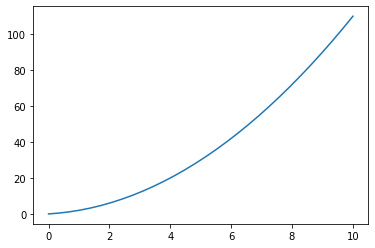

In [100]:
#varsayılan olarak nrows=1, ncols=1 olduğu için tek boyu
fig,ax = plt.subplots()

ax.plot(x,y)

plt.show()

In [103]:
ax

<li><b>Birden fazla axes ile</b></li>

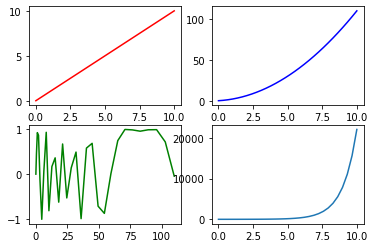

In [106]:
#satir ve sutün sayısını 2 yaptığımız için 2x2 lik bir dizi dönecek
fig,ax = plt.subplots(nrows=2,ncols=2)

ax[0,0].plot(x,x,"r")
ax[0,1].plot(x,y,"b")
ax[1,0].plot(y,np.sin(y),"g")
ax[1,1].plot(x,np.exp(x))

plt.show()

In [105]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1724B3908>,
      dtype=object)